In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the data
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')


In [4]:
# Getting the shape of data
print(train_df.shape)
print(test_df.shape)

(2000, 21)
(1000, 21)


In [7]:
# Checking the duplicates in the data
train_df.duplicated().sum()

np.int64(0)

In [8]:
# Checking the duplicates in the data
test_df.duplicated().sum()

np.int64(0)

In [ ]:
#np.int64(0) means there are no duplicates in the data

In [10]:
# Getting an idea about the Null values
train_df.isnull().sum().any()

np.False_

In [11]:
# Getting an idea about the Null values
test_df.isnull().sum().any()

np.False_

In [ ]:
# np.False_ means there are no Null values

In [ ]:
# EDA ->

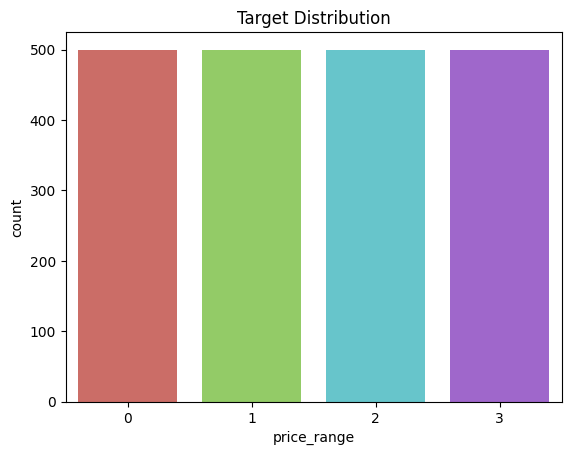

In [13]:
# Target distribution->
sns.countplot(x = 'price_range', data = train_df, palette= 'hls')
plt.title('Target Distribution')
plt.show()

In [ ]:
# The data looks perfectly balanced.

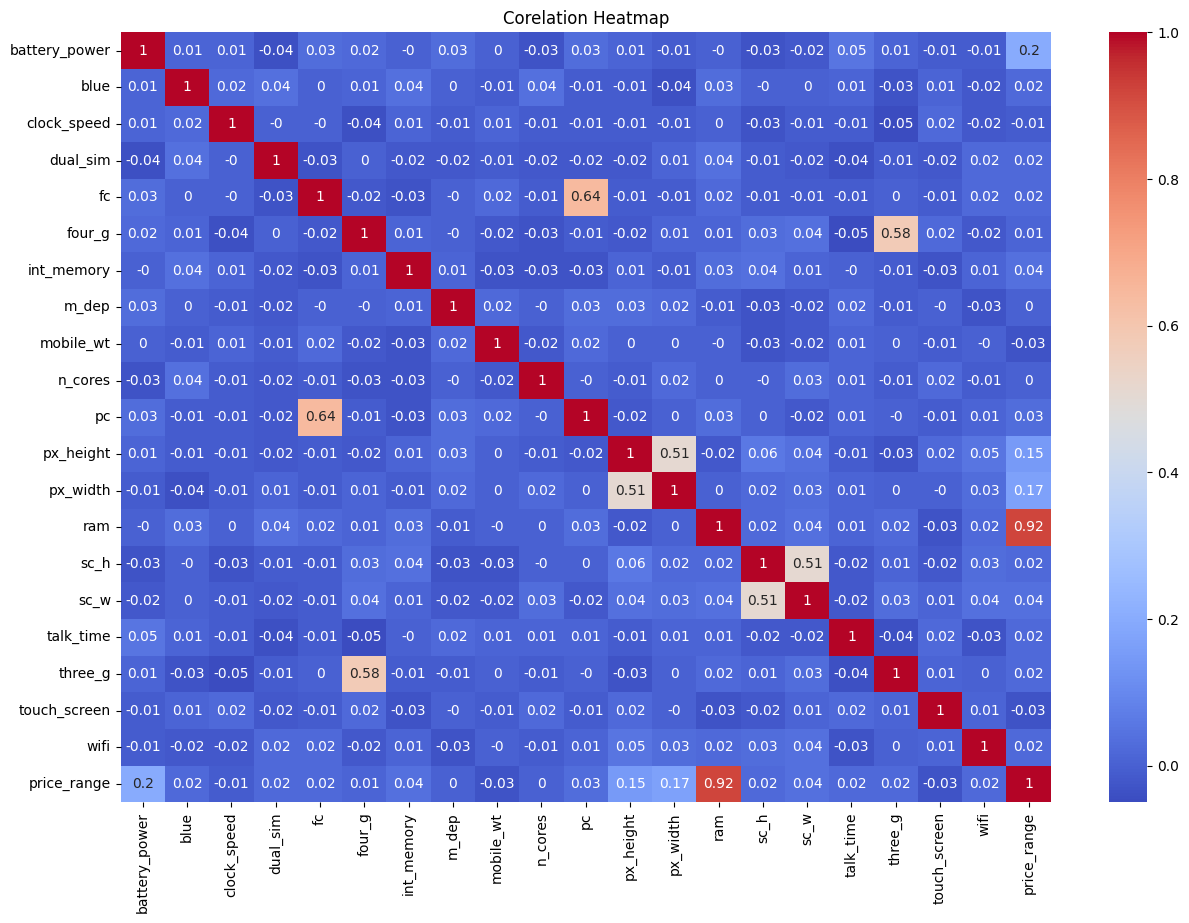

In [14]:
# Corelation heatmap
plt.figure(figsize=(15,10))
corr = train_df.corr().round(2)
sns.heatmap(corr, annot=True, cmap= 'coolwarm')
plt.title('Corelation Heatmap')
plt.show()

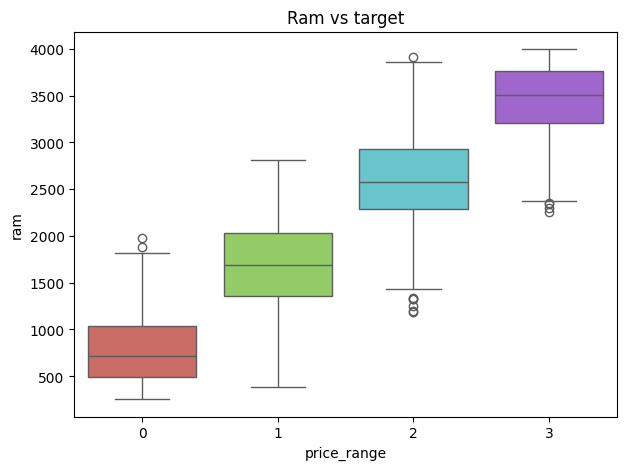

In [18]:
# Important numeric features vs target
plt.figure(figsize= (7,5))
sns.boxplot(x = 'price_range', y = 'ram', data = train_df, palette= 'hls')
plt.title('Ram vs target')
plt.show()

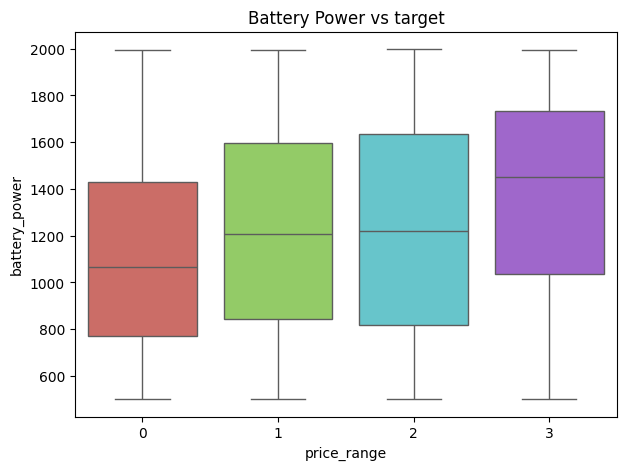

In [17]:
plt.figure(figsize= (7,5))
sns.boxplot(x = 'price_range', y = 'battery_power', data = train_df, palette= 'hls')
plt.title('Battery Power vs target')
plt.show()

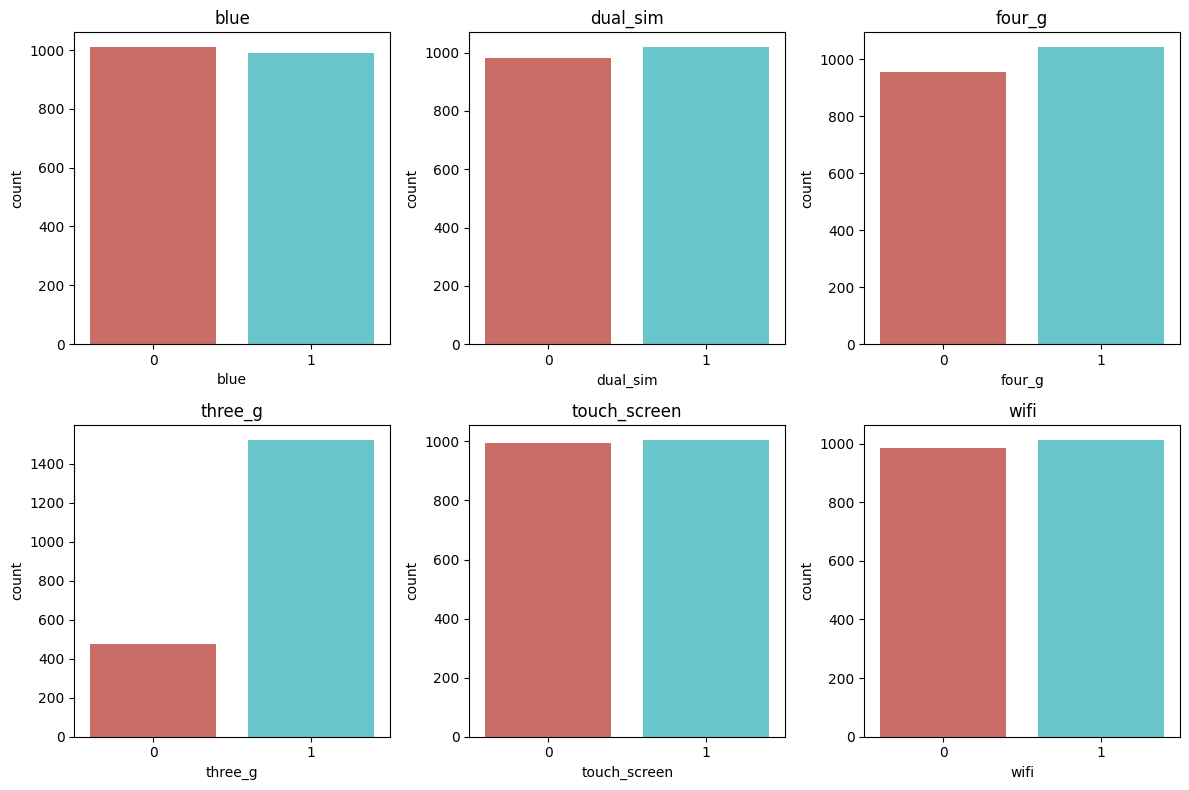

In [22]:
# Binary features
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
fig,axes = plt.subplots(2, 3, figsize= (12,8))
axes = axes.flatten()
for i, f in enumerate(binary_features):
  sns.countplot(x= f, data = train_df, palette= 'hls', ax= axes[i])
  axes[i].set_title(f)
plt.tight_layout()
plt.show()

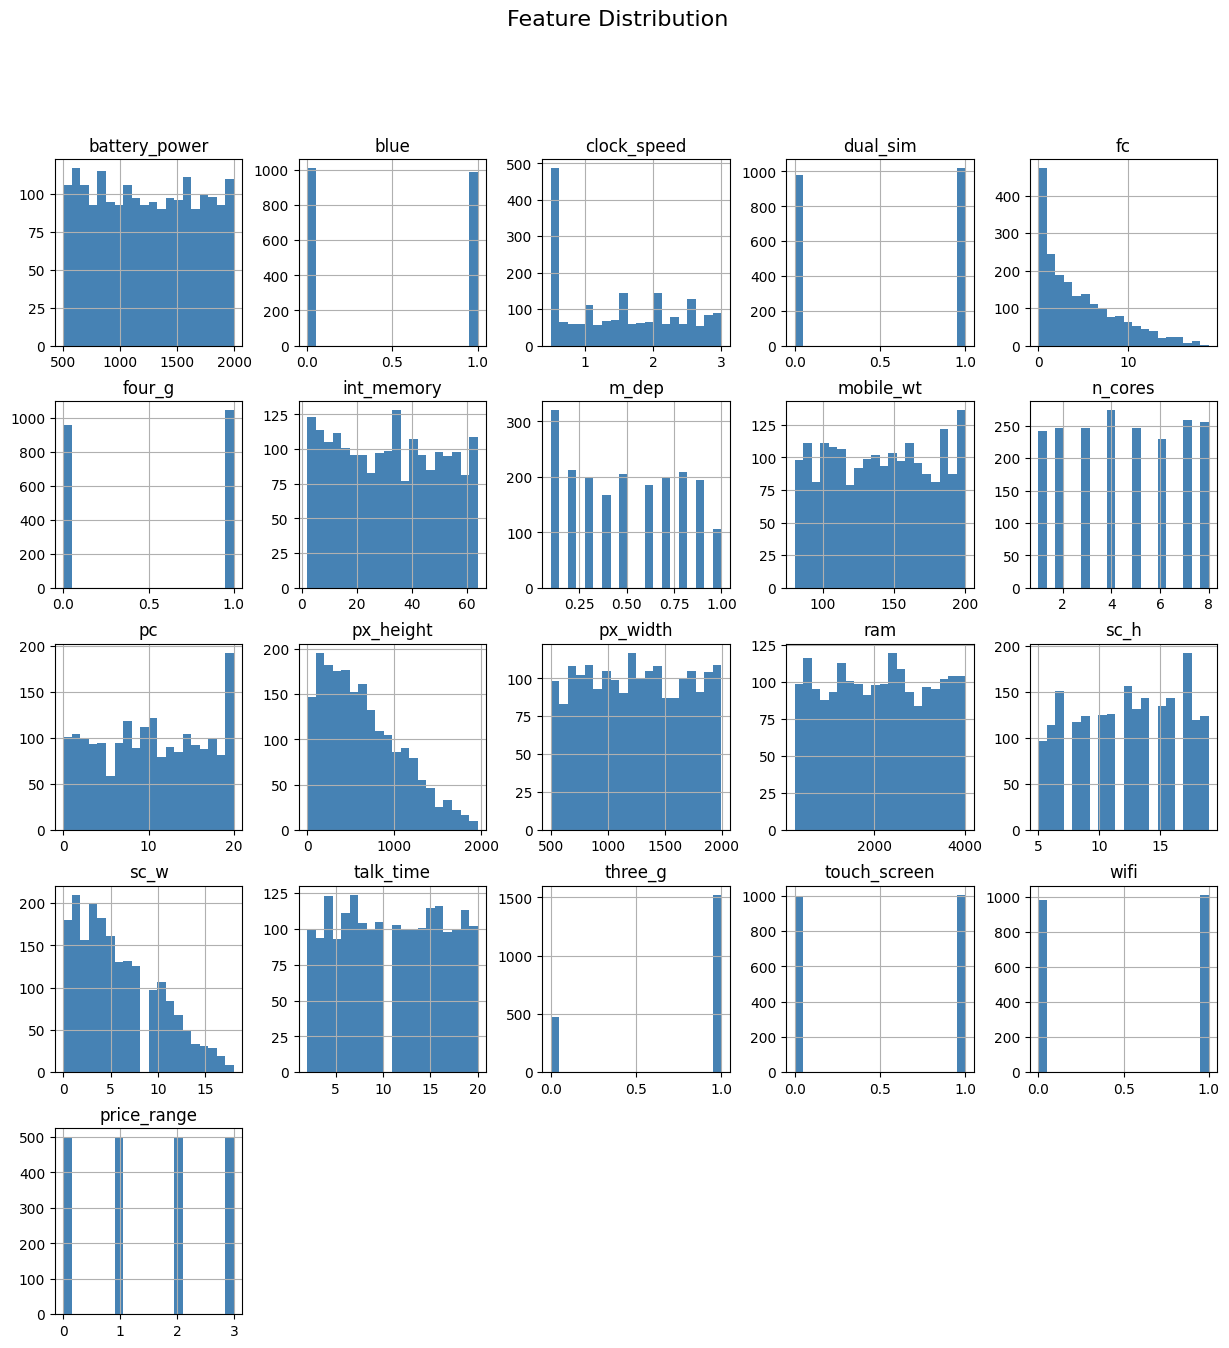

In [23]:
# Feature Distribution
train_df.hist(bins = 20, figsize= (15,15), color = 'steelblue')
plt.suptitle('Feature Distribution', size = 16)
plt.show()

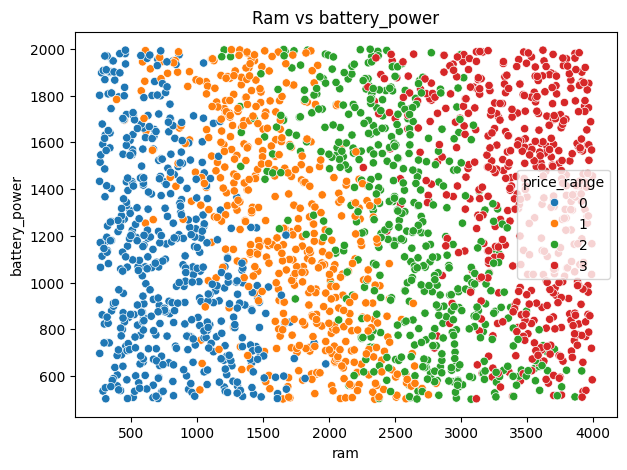

In [25]:
# Scatter Plot
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'ram', y = 'battery_power', hue = 'price_range', data = train_df, palette= 'tab10')
plt.title('Ram vs battery_power')
plt.show()

In [26]:
# Preprocessing the data
x = train_df.drop('price_range', axis = 1)
y = train_df['price_range']

In [32]:
# Scaling the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_test_final = scaler.transform(test_df.drop('id', axis = 1))

In [40]:
# Performing train test split
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y, test_size= 0.2, stratify = y, random_state= 5)

In [ ]:
# help()

In [41]:
# Baseline ML models
print("--- Logistic Regression Model ---")
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_val)
print('Accuracy Score :', np.round(metrics.accuracy_score(y_val, y_pred), 3))

--- Logistic Regression Model ---
Accuracy Score : 0.965


In [42]:
# Random Forest Model
print("--- Random Forest Model ---")
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
print('Accuracy Score :', np.round(metrics.accuracy_score(y_val, y_pred), 3))

--- Random Forest Model ---
Accuracy Score : 0.888


In [43]:
# Baseline ANN classifier
model_base = Sequential([
    Dense(32, activation = 'relu', input_dim = x_train.shape[1]),
    Dense(4, activation = 'softmax')
])

In [44]:
# Compiling the Model
model_base.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [46]:
# Fitting the Model
history_base = model_base.fit(x_train, y_train, epochs = 30, batch_size= 32, validation_data = (x_val, y_val), verbose = 1)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9684 - loss: 0.1986 - val_accuracy: 0.9000 - val_loss: 0.2704
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9762 - loss: 0.1895 - val_accuracy: 0.8950 - val_loss: 0.2639
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.1901 - val_accuracy: 0.8975 - val_loss: 0.2583
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9716 - loss: 0.1796 - val_accuracy: 0.9075 - val_loss: 0.2530
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9771 - loss: 0.1703 - val_accuracy: 0.9175 - val_loss: 0.2484
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.1728 - val_accuracy: 0.9100 - val_loss: 0.2440
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9820 - loss: 0.1619 - val_accuracy: 0.9150 - val_loss: 0.2385
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.1502 - val_accuracy: 0.9100 - val_loss:

In [47]:
# Evaluate the Model
loss_base, acc_base = model_base.evaluate(x_val, y_val)
print('Loss :', np.round(loss_base, 3))
print('Accuracy :', np.round(acc_base, 3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9253 - loss: 0.1684 
Loss : 0.193
Accuracy : 0.913


In [48]:
# Optimized  ANN with Dropout
model_opt = Sequential([
    Dense(128, activation = 'relu', input_dim = x_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.3),
    Dense(4, activation = 'softmax')
])

In [49]:
# Model Compiling
model_opt.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [50]:
# EarlyStopping
early_stop = EarlyStopping(monitor= 'val_loss', patience= 5, restore_best_weights= True)

In [51]:
# Model Training
history_opt = model_opt.fit(x_train, y_train, epochs = 100, batch_size= 32, validation_data = (x_val, y_val), verbose = 1, callbacks= [early_stop])

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2818 - loss: 1.4226 - val_accuracy: 0.4375 - val_loss: 1.2487
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4485 - loss: 1.2009 - val_accuracy: 0.5925 - val_loss: 0.8978
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5557 - loss: 0.9182 - val_accuracy: 0.7900 - val_loss: 0.6039
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7272 - loss: 0.6669 - val_accuracy: 0.8450 - val_loss: 0.4452
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7586 - loss: 0.5839 - val_accuracy: 0.8750 - val_loss: 0.3719
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.5078 - val_accuracy: 0.8450 - val_loss: 0.3523
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8227 - loss: 0.4316 - val_accuracy: 0.8900 - val_loss: 0.2890
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8374 - loss: 0.4170 - val_accuracy: 0.9000 - v

In [52]:
# Model Evaluation
loss_opt , acc_opt = model_opt.evaluate(x_val, y_val)
print('Loss :', np.round(loss_opt, 3))
print('Accuracy :', np.round(acc_opt, 3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9190 - loss: 0.1880 
Loss : 0.195
Accuracy : 0.918


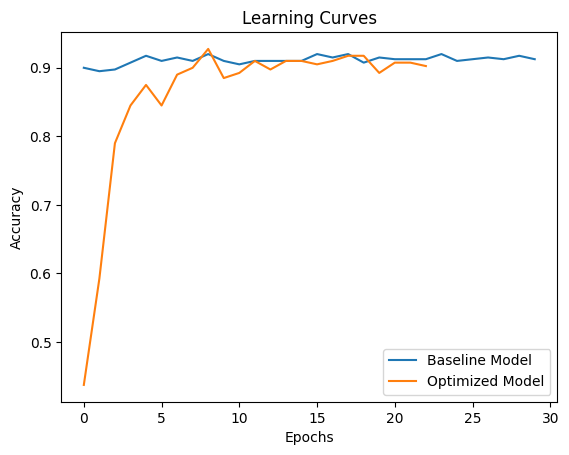

In [53]:
# learning Curves
plt.plot(history_base.history['val_accuracy'], label = 'Baseline Model')
plt.plot(history_opt.history['val_accuracy'], label = 'Optimized Model')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
# Evaluation on real tesing data
y_val_pred = model_opt.predict(x_val)
y_val_pred_labels = np.argmax(y_val_pred, axis = 1)
print('Accuracy Score :', np.round(metrics.accuracy_score(y_val, y_val_pred_labels), 3))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy Score : 0.918


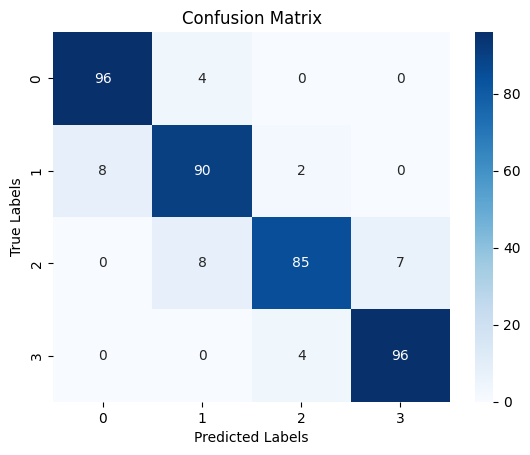

In [55]:
# Conclusion Matrix
cm = metrics.confusion_matrix(y_val, y_val_pred_labels)
sns.heatmap(cm, annot= True, cmap= 'Blues', fmt= 'd',
            xticklabels= [0,1,2,3],
            yticklabels= [0,1,2,3])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Prediction on Test data
test_predictions = model_opt.predict(x_test_final)
test_labels = np.argmax(test_predictions, axis = 1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [57]:
# Creating the submission file
submission = test_df.copy()
submission['price_range'] = test_labels
submission.to_csv('submission.csv', index = False)